# Project 2 - creating neural net from scratch

The objective of this project is to design a mini “deep learning framework” using only pytorch’s tensor operations and the standard math library, hence in particular without using autograd or the neural-network modules.

Your framework should import only `torch.FloatTensor` and `torch.LongTensor` from pytorch, and use no pre-existing neural-network python toolbox.


-------------
# /////////////TODO/////////////

- start on the report
- create plot of decisionline with model and data as input (for better debugging and insight)
- create Relu()-module
- create proper MSEloss()-module
- create train_model() or similar
- create split_dataset() or similar
- create the net they request

-------------------------------------
-------------------------------------

In [79]:
# Definitely allowed imports
import math
import torch
from torch import FloatTensor, LongTensor, Tensor
# additional imports
import matplotlib
import matplotlib.pyplot as plt


# our own written code
import helpers as HL

# To plot, delete before handin
import numpy as np

# jupyter magic
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
matplotlib.__version__

'2.1.2'

## Generate datasets

__Generate linear data__

torch.Size([1000, 2]) torch.Size([1000, 1])


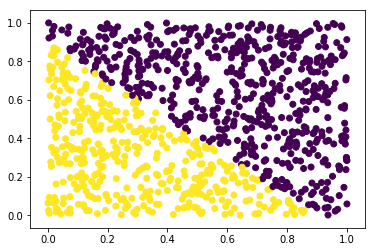

In [81]:
linear_inputs, linear_targets = HL.generate_linear_data()
print(linear_inputs.shape, linear_targets.shape)

# plot the data
plt.scatter(linear_inputs[:,0], linear_inputs[:,1], c=np.squeeze(linear_targets.numpy()))
plt.show()

__Generate a training and a validation set of 1,000 points sampled uniformly in [0,1]2, each with a
label 0 if outside the disk of radius 1/ 2π and 1 inside__

torch.Size([1000, 2]) torch.Size([1000, 1])


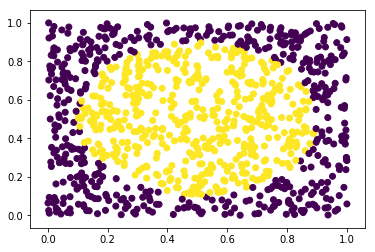

In [82]:
inputs, targets = HL.generate_disc_data(n=1000)
print(inputs.shape, targets.shape)

# plot the data
plt.scatter(inputs[:,0].numpy(), inputs[:,1].numpy(), c=np.squeeze(targets.numpy()))
plt.savefig('data_generation.png')
plt.show()

#### Generate a test set to test the final model

## Build a network
...with `2` input units, `2` output units, `3` hidden layers of `25` units

Some modules may requires additional methods, and some modules may keep track of information
from the forward pass to be used in the backward.
You should implement at least the modules: `Linear` (fully connected layer), `ReLU` , `Tanh` , `Sequential`  to combine several modules in basic sequential structure, and LossMSE to compute the MSE loss.

## Split dataset

In [83]:
# split the dataset into train and and validation data
train_inputs, train_targets, validation_inputs, validation_targets, test_inputs, test_targets = HL.split_dataset(inputs, targets, train_perc=0.7, val_perc=0.1, test_perc=0.2)
print(train_inputs.size(), train_targets.size(), validation_inputs.size(), validation_targets.size(), test_inputs.size(), test_targets.size())

torch.Size([700, 2]) torch.Size([700, 1]) torch.Size([100, 2]) torch.Size([100, 1]) torch.Size([200, 2]) torch.Size([200, 1])


#### Normalize data

In [84]:
mu , std = inputs.mean() , inputs.std()
train_inputs.sub_( mu ).div_( std )
validation_inputs.sub_( mu ).div_( std )
test_inputs.sub_( mu ).div_( std )


-1.2944 -0.4148
-0.6844 -0.2193
 0.4144  1.1730
 1.7053 -0.6845
-1.6729  1.1378
 1.4928  1.6348
 0.3890  1.0919
 0.0046 -1.2133
-1.3777 -1.0269
 0.2602 -0.4333
 0.4385  0.6026
-1.0850  0.1372
 1.6603  1.1289
-0.1902 -0.3574
-0.6679  0.5619
-1.0332  1.6971
 0.0247 -1.1062
-0.8306 -0.6591
-1.3595 -0.5348
-1.6438  0.5804
-0.5573  0.4168
-0.8384 -0.7744
-0.8367 -0.0147
-1.3033 -1.5227
 0.3549 -1.4726
 1.3869  1.2931
 0.9835  1.1540
-1.0025  0.2589
 0.3697  1.4941
-1.5446 -0.4920
 0.8681  0.9103
-1.6590  1.5776
 1.1356  1.4531
-0.6278 -0.8691
 0.4699  1.2564
 1.4908 -1.1243
 1.0950 -0.2740
-0.8055  1.0071
 0.8031  0.3848
-1.0754  1.6099
-0.2960  0.0527
-0.5410 -1.4463
-0.3068  0.3396
 0.1361 -0.4002
 1.2026 -0.2497
-1.3050 -0.6863
-0.4072  1.1252
 1.3386  0.5944
 1.6539  1.6365
 0.3878  1.1747
 0.7391  0.2484
 1.5610 -0.4410
-1.3610 -1.5132
 1.0576 -1.2029
 0.7362 -0.0970
-1.6132 -0.5515
 0.6152  0.0060
 0.6670 -0.6612
-0.7797 -0.1246
-1.5083 -0.3482
 0.0951  0.6964
-0.5296  1.0827
-0.0430

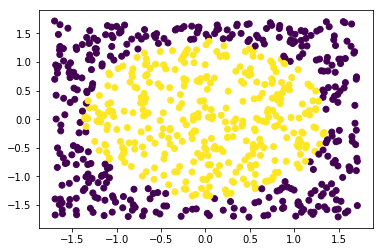

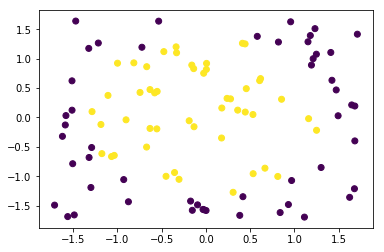

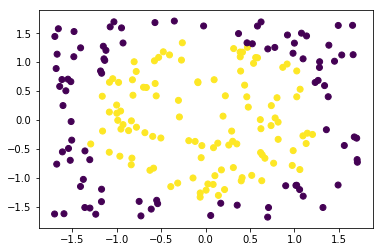

In [85]:
# plot the data
plt.scatter(train_inputs[:,0].numpy(), train_inputs[:,1].numpy(), c=np.squeeze(train_targets.numpy()))
plt.show()

plt.scatter(validation_inputs[:,0].numpy(), validation_inputs[:,1].numpy(), c=np.squeeze(validation_targets.numpy()))
plt.show()

plt.scatter(test_inputs[:,0].numpy(), test_inputs[:,1].numpy(), c=np.squeeze(test_targets.numpy()))
plt.show()

## Test the training Linear Regression

## Run with Sequential

In [96]:
input_dim = 2
hidden_width = 25
output_dim = 2

### Linear + Relu + Linear + Relu + Linear + Tanh + Linear + Tanh
model = HL.Sequential([HL.Linear(input_dim, hidden_width), HL.ReLu(), HL.Linear(hidden_width, hidden_width), HL.ReLu(), HL.Linear(hidden_width, hidden_width), HL.Tanh(), HL.Linear(hidden_width, output_dim), HL.Tanh()])

In [101]:
model, train_error_list, test_error_list = HL.train_model(train_inputs, train_targets, validation_inputs, validation_targets, 
                                                    model, learning_rate = 0.0001, epochs=300)

grad

1.00000e-04 *
  1.9344
 -0.0834
[torch.FloatTensor of size 2]

grad

 1.9095e-13
 2.6642e-09
-1.6862e-19
-2.5943e-25
-1.1261e-12
 8.6616e-20
-9.6147e-31
-3.2575e-18
 5.9818e-39
-1.7220e-07
 1.1029e-25
-1.5339e-08
 9.7543e-15
 3.7401e-15
 8.5548e-05
 2.1056e-35
 4.9182e-11
-2.7482e-09
-6.9032e-14
-2.7675e-19
-4.0074e-17
 9.5083e-09
-7.3827e-05
-6.8029e-09
-9.5627e-10
[torch.FloatTensor of size 25]

grad

1.00000e-04 *
  0.0000
  0.0000
 -1.4395
  0.6478
  0.0000
  0.3517
  0.0000
 -0.0602
  0.1478
  0.0000
  0.0000
  0.0000
  0.0000
  0.8856
  0.0000
  0.5256
  0.0000
  1.5809
  0.0000
  0.0000
  0.0000
  0.3207
  0.0000
  0.0000
  0.0000
[torch.FloatTensor of size 25]

grad

1.00000e-04 *
 -1.3383
  1.3450
  1.9006
 -2.4079
 -1.3663
  0.0000
 -0.1708
  2.8111
 -1.1174
 -0.1948
  0.0000
  0.0000
  1.1479
  0.0000
  1.0608
 -2.1345
  2.5462
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.5060
[torch.FloatTensor of size 25]

grad

 0.0107
-0.1990
[torch.FloatTenso


grad

 9.0599e-03
-1.0567e-04
 3.3599e-19
-2.0659e-03
-1.2782e-04
 8.8072e-13
-3.8977e-13
-1.5727e-09
 4.2037e-38
-9.3159e-02
-4.1840e-31
-1.3456e-01
-4.7054e-09
 5.8705e-02
 6.8951e-02
 7.8513e-15
 8.2413e-13
-1.3991e-32
 1.1788e-08
-4.1298e-12
-1.5344e-16
 9.1828e-09
-1.0416e-01
-7.9143e-18
-7.5296e-08
[torch.FloatTensor of size 25]

grad

 0.0000
 0.2871
-0.1419
 0.0000
 0.0000
-0.2365
-0.2576
-0.2559
 0.1230
 0.0000
 0.0752
 0.0000
 0.0000
-0.0179
 0.1655
 0.0551
-0.2249
-0.0599
 0.1976
 0.0000
 0.3483
 0.2879
 0.0000
 0.0000
 0.0000
[torch.FloatTensor of size 25]

grad

-1.2616
 1.2453
 0.1347
 0.8432
-1.2389
-0.9540
-1.4590
 0.0000
-0.5727
 0.7793
 0.0000
 0.0000
 0.1174
 0.0000
 0.6798
-0.9369
-1.6385
 0.0000
 0.0000
 0.8791
 1.9546
-0.0076
 0.0000
 0.0000
 0.7151
[torch.FloatTensor of size 25]

grad

1.00000e-03 *
  4.6545
 -9.2725
[torch.FloatTensor of size 2]

grad

 1.7279e-11
-2.5392e-04
 2.5852e-04
 1.0010e-26
-7.4761e-10
 2.5454e-17
-1.2201e-27
-2.9528e-12
-7.8065e-29
-5


grad

1.00000e-04 *
  3.7497
 -0.3188
[torch.FloatTensor of size 2]

grad

 1.9831e-10
 2.8275e-09
-3.1121e-21
-4.7228e-20
-3.1949e-13
 8.6567e-21
-1.0455e-31
-3.3986e-20
 8.6141e-40
-7.6079e-07
 3.6215e-28
-4.9909e-07
-1.8932e-16
 4.6845e-11
 2.1074e-04
 3.1984e-35
 9.8461e-10
-1.2411e-07
-3.5540e-13
-5.9340e-17
-2.3010e-19
 4.8473e-10
-1.3528e-04
-2.7276e-05
-2.1249e-09
[torch.FloatTensor of size 25]

grad

1.00000e-04 *
  0.0000
  0.0000
 -3.5853
  1.7960
  0.0000
  1.0559
  0.0000
  0.1451
  0.4405
  0.0000
  0.0000
  0.0000
  0.0000
  2.2673
  0.0000
  1.4703
  0.0000
  3.2127
  0.0000
  0.0000
  0.0000
  0.8461
  0.0000
  0.0000
  0.0000
[torch.FloatTensor of size 25]

grad

1.00000e-04 *
 -3.7425
  1.1853
  4.1889
 -4.7105
 -5.1995
  0.0000
 -0.1332
  0.0000
 -0.3557
  0.0769
  0.0000
  0.0000
  3.0306
  0.0000
  2.1278
 -3.2739
  5.8529
  0.0000
  0.0000
  7.9121
  0.0000
  0.0000
  0.0000
  0.0000
  1.2813
[torch.FloatTensor of size 25]

grad

1.00000e-04 *
  0.0262
 -1.0067


grad

1.00000e-02 *
 -3.9195
  1.3644
[torch.FloatTensor of size 2]

grad

1.00000e-05 *
 -0.0000
 -0.0000
  0.0000
  0.0000
  5.1509
 -0.0000
  0.0000
  0.0000
 -0.0000
  0.0000
  0.0000
  0.0000
  0.0000
 -0.0000
 -0.0000
  0.0000
 -0.0682
  1.4978
  0.0000
  0.0000
  0.0000
 -0.0000
  0.0000
  0.0001
  0.0000
[torch.FloatTensor of size 25]

grad

1.00000e-05 *
  0.0000
  0.0000
  5.1177
  0.0000
 -7.3169
  7.5679
  0.0000
  1.2682
  0.0000
 -2.5293
  1.9056
 -7.2878
  0.0000
 -0.2475
  0.0000
 -4.0300
  4.5243
 -1.1707
 -1.8067
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
[torch.FloatTensor of size 25]

grad

1.00000e-04 *
  0.5661
  0.0000
  0.0000
  0.0000
  1.4852
  0.0000
  2.0637
 -1.4735
  0.0000
  0.0000
  0.9396
  0.0000
  0.0000
  0.0000
 -0.7254
  0.0000
  0.4410
 -1.4595
 -0.6777
  0.0000
  0.0000
  0.0000
 -2.4208
 -1.4684
  0.5149
[torch.FloatTensor of size 25]

grad

1.00000e-03 *
 -1.5392
  0.0012
[torch.FloatTensor of size 2]

grad

-1.4905e-07
-2.0908e-14
 


grad

1.00000e-04 *
  0.2811
 -0.0351
 -2.4080
  1.3680
  1.2464
  0.1585
  0.0000
  0.0000
 -3.3353
 -0.3987
  0.0000
  0.0000
 -0.1755
  0.0000
 -0.7556
  1.7263
 -0.6408
  0.0000
  0.0000
  0.8334
  0.4146
  2.5872
  0.0000
  0.0000
 -1.1052
[torch.FloatTensor of size 25]

grad

1.00000e-02 *
  3.4550
 -0.9111
[torch.FloatTensor of size 2]

grad

 4.7872e-14
 2.1539e-07
-1.9341e-07
-2.5966e-29
-2.9296e-07
 4.3222e-14
-6.6611e-29
-8.0947e-13
 6.7336e-24
-6.7492e-14
-6.6807e-17
-5.5776e-08
-7.9532e-04
 1.9197e-27
 1.3151e-08
 3.4045e-32
 7.5305e-08
-2.3384e-08
-3.2461e-14
-1.7229e-26
-7.0995e-15
 4.7866e-10
-2.3141e-09
-9.3314e-12
-1.5985e-03
[torch.FloatTensor of size 25]

grad

1.00000e-03 *
  0.0000
  0.0000
 -2.2848
  0.0000
  0.0000
  2.2263
  0.0000
 -0.9058
  3.9082
 -1.2809
  0.0000
  0.7702
  0.0000
  2.0644
  0.0000
  2.5715
  2.8856
 -0.1596
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
[torch.FloatTensor of size 25]

grad

1.00000e-02 *
 -0.4396
  0.0000



grad

1.00000e-05 *
 -0.1683
  0.0000
  0.0000
 -1.7268
 -0.0535
 -2.5900
  1.6537
  0.0000
  3.1557
  0.0000
  0.0000
  0.0000
 -2.2700
  0.0000
 -0.6917
  0.2119
 -0.7644
  0.0000
  0.0000
  0.0000
 -3.3997
  4.6141
  0.0000
  0.0000
 -1.4369
[torch.FloatTensor of size 25]

grad

-0.0199
 0.1051
[torch.FloatTensor of size 2]

grad

-6.3355e-14
 6.1133e-02
-2.9480e-14
-3.2243e-11
 1.4511e-03
-9.5076e-18
-4.3364e-10
-2.7409e-33
 8.0447e-27
 8.0071e-09
 3.8751e-27
 7.1372e-10
 1.1808e-02
-2.1776e-03
-1.3520e-04
 1.9387e-27
-1.7588e-10
 7.8951e-33
-1.4114e-19
 7.4754e-28
 7.7465e-13
-5.5854e-16
 2.0520e-10
 2.5428e-04
-2.0302e-03
[torch.FloatTensor of size 25]

grad

1.00000e-02 *
  0.0000
  4.4630
  0.2976
  0.0000
  0.0000
 -2.0349
  0.0000
 -3.2281
  0.0000
  0.0000
  3.3337
  0.0000
  0.0000
 -7.0139
 -7.3296
  6.6360
 -8.1951
  4.2237
 -8.0761
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
[torch.FloatTensor of size 25]

grad

 0.0488
 0.0000
 0.0000
 0.0000
 0.0929
 0.0000


grad

1.00000e-02 *
 -0.2848
  1.3157
 -0.0000
 -0.0000
  0.2818
 -0.0000
 -0.0083
 -0.0000
  0.0000
  0.0072
  0.0000
  0.1727
  0.0000
 -0.0017
 -0.1048
  0.0153
 -0.0000
  0.0000
 -0.0000
  0.0000
  0.0000
  0.0000
  0.2663
  0.0000
 -0.0000
[torch.FloatTensor of size 25]

grad

1.00000e-02 *
  0.0000
  0.8794
  0.2737
  0.0000
  0.0000
 -0.1533
  0.1465
  0.1042
  0.6317
  0.0000
  1.1257
  0.0000
  0.0000
 -1.6472
 -2.2199
  0.9668
 -1.3189
  0.8681
 -2.0161
  1.1601
  2.9970
 -0.5557
  0.0000
  0.0000
  0.0000
[torch.FloatTensor of size 25]

grad

1.00000e-02 *
  4.7168
 -2.9883
  9.2378
 -2.1280
 -0.8302
 -1.5381
 -2.7461
  0.0000
 -3.8719
  0.0000
  0.0000
  0.0000
  2.1864
  0.0000
  5.1341
 -1.6796
  2.4336
  0.0000
  0.0000
 -0.5541
  9.2249
 -6.1415
  0.0000
  0.0000
  0.8918
[torch.FloatTensor of size 25]

grad

 0.3556
-0.0421
[torch.FloatTensor of size 2]

grad

 0.0000
 0.0000
-0.0000
-0.0000
-0.3383
 0.0000
-0.0000
-0.0000
 0.0000
-0.0000
 0.0000
-0.0000
-0.0000
 0.000

grad

1.00000e-06 *
  0.0000
 -1.3411
 -0.2129
 -2.2967
  0.0000
  1.6811
 -0.2847
  1.1386
 -0.4234
  0.0000
  0.0000
  0.0000
  0.0000
  1.6288
  0.0000
 -0.2512
  0.0000
  0.9099
  0.6418
  0.0000
 -3.5909
  0.0072
  0.0000
  0.0000
  0.0000
[torch.FloatTensor of size 25]

grad

1.00000e-06 *
 -0.9323
 -1.3605
 -6.5789
  2.8171
  2.4974
  1.9694
  0.0000
  0.0000
  0.0047
 -0.6943
  0.0000
  0.0000
  2.6786
  0.0000
 -7.4638
  3.2189
  9.8274
  0.0000
  0.0000
 -3.4050
 -8.1945
  6.8292
  0.0000
  0.0000
 -2.2886
[torch.FloatTensor of size 25]

grad

1.00000e-03 *
  1.3078
 -0.0033
[torch.FloatTensor of size 2]

grad

 1.1042e-09
 7.6785e-08
-1.4179e-19
-2.6031e-19
-1.4303e-12
 2.2282e-21
-7.9983e-30
-1.5840e-17
 7.3694e-39
-1.8846e-07
 1.9934e-27
-6.4970e-07
 4.3911e-14
 7.6624e-12
 6.1618e-05
 2.6786e-31
 7.2750e-11
-1.1941e-09
-1.2550e-10
-1.3089e-15
-1.3712e-18
 3.5336e-09
-4.2303e-04
-7.6368e-04
-5.2421e-08
[torch.FloatTensor of size 25]

grad

1.00000e-03 *
  0.0000
  0.0000
 


grad

1.00000e-05 *
  4.4864
 -0.0034
[torch.FloatTensor of size 2]

grad

 1.4903e-13
 9.4421e-06
-1.5290e-14
-9.3005e-18
-5.8805e-09
 5.4477e-22
-1.9854e-16
-5.7517e-20
 4.0756e-31
-2.3324e-10
 4.5298e-24
-4.0566e-10
 5.7096e-07
 1.6676e-13
 1.5162e-09
 2.1210e-19
 3.8692e-17
-4.4307e-27
-1.1028e-12
-2.0822e-24
-1.7058e-11
 1.4218e-12
-1.0846e-07
-2.0408e-05
-3.6427e-05
[torch.FloatTensor of size 25]

grad

1.00000e-05 *
  0.0000
  0.5019
 -4.4271
  0.0000
  0.0000
  4.9720
  0.0000
 -2.2315
  5.3469
  0.0000
 -5.2212
  0.0000
  0.0000
  3.6055
  0.0000
  8.6824
  8.0905
 -1.9159
  2.5235
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
[torch.FloatTensor of size 25]

grad

1.00000e-04 *
 -1.7391
  0.0000
  0.0000
  0.0000
 -0.8218
  0.0000
  1.2165
  1.1510
  3.8211
  0.0000
  0.0000
  0.0000
  0.0298
  0.0000
 -0.7273
  0.8046
  0.5602
  2.0683
  0.7546
  0.0000
 -1.7804
 -0.9010
  0.0000
  0.0000
 -0.1685
[torch.FloatTensor of size 25]

grad

1.00000e-04 *
  4.7867
 -0.0757



1.00000e-02 *
 -1.3220
 -2.4682
 -2.6737
  0.8801
 -1.0870
  0.0000
  1.1358
  0.0000
  3.2087
  0.0000
  0.0000
  0.0000
  0.3685
  0.0000
 -1.7461
  2.4480
  1.4965
  0.0000
  0.0000
  0.0000
  0.2146
  0.6761
  0.0000
  0.0000
 -2.2968
[torch.FloatTensor of size 25]

grad

1.00000e-03 *
 -0.0007
  1.8751
[torch.FloatTensor of size 2]

grad

1.00000e-03 *
 -0.0000
  1.0097
 -0.0000
 -0.0003
  0.5087
 -0.0000
 -0.0000
 -0.0000
  0.0000
  0.0000
  0.0000
  0.0190
  0.0000
 -0.0003
 -0.0037
  0.3373
 -0.0000
  0.0000
 -0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
 -0.0000
[torch.FloatTensor of size 25]

grad

1.00000e-03 *
  0.0000
  0.4802
  0.0728
  0.0000
  0.0000
  0.4355
 -0.5009
 -0.2061
  0.0000
  0.0000
  0.3833
  0.0000
  0.0000
 -1.2121
 -1.6203
  1.1801
 -1.1117
  1.3577
 -1.2724
  0.5990
  2.6354
 -0.1459
  2.7393
  0.0000
  0.0000
[torch.FloatTensor of size 25]

grad

1.00000e-03 *
  2.7990
  0.0000
  0.0000
 -0.0783
 -4.2164
 -1.4111
  3.7745
  0.0000
 -3.5758
  0.

grad

 4.1909e-02
-1.7285e-07
 1.3727e-20
 8.9346e-09
-8.3168e-11
 5.4781e-18
-5.2974e-31
-6.6679e-22
 7.3658e-37
-2.2443e+00
-2.6960e-26
-1.5062e+00
-2.0555e-11
 5.3798e-01
 9.6369e-03
-1.7664e-34
 1.7931e-03
-3.4357e+00
 2.2988e-10
-6.3114e-11
-3.2431e-18
 5.4284e-10
-5.3393e-01
-2.7465e-03
-2.5061e-06
[torch.FloatTensor of size 25]

grad

  0.0000
  0.0000
 -5.1945
  8.2831
  0.0000
 -7.3279
 -0.9460
-11.2209
  9.0829
  0.0000
  0.0000
  0.0000
  0.0000
  1.5043
  0.0000
  4.6676
  0.0000
 -1.5699
  0.0000
  0.0000
  5.4820
  4.3281
  0.0000
  0.0000
  0.0000
[torch.FloatTensor of size 25]

grad

-30.5370
 24.8194
 27.9400
 -5.0699
 -6.3249
  0.0000
-34.9545
  0.0000
 14.4012
 28.2819
  0.0000
  0.0000
-30.4962
  0.0000
 33.9038
-37.3288
-38.3634
  0.0000
  0.0000
  1.7297
  0.0000
  0.0000
  0.0000
  0.0000
 16.4200
[torch.FloatTensor of size 25]

grad

1.00000e-03 *
  9.2507
 -0.0515
[torch.FloatTensor of size 2]

grad

 2.3563e-08
 7.3746e-07
-2.5767e-18
-8.0687e-18
-1.0307e-11
 


-0.0000
 0.0001
-0.0000
 0.0000
 5.3076
-0.0000
 0.0000
 0.0000
-0.0000
 0.0000
 0.0000
 0.0000
 0.0000
-0.0000
-0.0000
 0.0000
-4.2155
 0.0000
-0.0000
 0.0000
 0.0000
-0.0000
 0.0000
 0.0079
 0.0000
[torch.FloatTensor of size 25]

grad

  0.0000
  0.0000
  9.3045
  0.0000
  0.0000
  1.0893
  0.0000
 -2.6243
  0.0000
  3.3182
  2.7445
 -9.7430
  0.0000
 12.0275
  0.0000
 -3.5595
  1.6425
 -2.4688
 -5.9261
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
[torch.FloatTensor of size 25]

grad

-10.9657
  0.0000
  0.0000
  0.0000
 23.7730
  0.0000
  3.2120
 -9.3201
  0.0000
  0.0000
 20.8620
  0.0000
  0.0000
  0.0000
  2.4771
  0.0000
  3.9932
-32.0017
 -0.9215
  0.0000
 -9.9372
  0.0000
-37.8085
  3.8795
 14.3695
[torch.FloatTensor of size 25]

grad

1.00000e-02 *
 -3.9889
  1.3297
[torch.FloatTensor of size 2]

grad

1.00000e-03 *
 -0.0000
 -0.0000
  0.0000
  0.0000
  1.5709
 -0.0000
  0.0000
  0.0000
 -0.0000
  0.0000
  0.0000
  0.0000
  0.0000
 -0.0000
 -0.0000
  0.0000
 -0.1622

grad

1.00000e-03 *
 -0.7086
  2.2606
[torch.FloatTensor of size 2]

grad

1.00000e-03 *
 -0.0196
  0.0961
 -0.0000
 -0.0000
  1.5543
 -0.0000
  0.0000
 -0.0000
  0.0000
  0.0000
  0.0000
  0.0041
  0.0000
 -0.0000
 -0.1276
  1.6334
 -0.0000
  0.0000
 -0.0000
  0.0000
  0.0000
 -0.0000
  0.0006
  0.0000
 -0.0000
[torch.FloatTensor of size 25]

grad

1.00000e-03 *
  0.0000
 -2.0629
  0.7507
  0.0000
  0.0000
  2.5585
  0.5661
  0.3272
  3.7858
  0.0000
 -1.3649
  0.0000
  0.0000
 -1.2961
 -0.8736
  0.5935
  0.7976
  3.5496
  0.3443
 -0.3845
  1.6692
 -1.1639
  5.6768
  0.0000
  0.0000
[torch.FloatTensor of size 25]

grad

1.00000e-02 *
  0.5254
  0.0000
  0.0000
  0.5807
 -0.2536
  0.2756
  1.7895
  0.0000
  0.2407
  0.0000
  0.0000
  0.0000
  0.5641
  0.0000
  0.0728
 -0.5851
  1.6232
  0.0000
  0.0000
 -0.0424
 -0.4454
 -0.9235
  0.0000
  0.0000
  1.1866
[torch.FloatTensor of size 25]

grad

 3.3973e-04
-1.8490e-09
[torch.FloatTensor of size 2]

grad

 4.3292e-12
 3.0137e-05
-4.0861e-


grad

-0.1290
 0.0342
[torch.FloatTensor of size 2]

grad

1.00000e-02 *
 -0.0000
 -0.0000
  0.0000
  0.0000
  7.2862
 -0.0000
  0.0000
  0.0000
 -0.0000
  0.0000
  0.0000
  0.0000
  0.0000
 -0.0000
 -0.0000
  0.0000
 -1.8395
  0.0113
  0.0000
  0.0000
  0.0000
 -0.0000
  0.0000
  0.0000
  0.0000
[torch.FloatTensor of size 25]

grad

1.00000e-02 *
  0.0000
  0.0000
  6.6143
  0.0000
  0.0000
  6.6672
  0.0000
 -2.9583
  0.0000
  0.7065
  1.9484
 -9.2539
  0.0000
  6.5308
  0.0000
 -3.6795
  3.0351
 -1.7297
 -5.6812
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
[torch.FloatTensor of size 25]

grad

-0.0159
 0.0000
 0.0000
 0.0000
 0.1133
 0.0000
 0.1246
-0.1070
 0.0000
 0.0000
 0.1771
 0.0000
 0.0000
 0.0000
-0.0512
 0.0000
 0.0817
-0.3086
-0.1328
 0.0000
 0.0000
 0.0000
-0.1988
-0.0502
 0.1572
[torch.FloatTensor of size 25]

grad

 0.0145
-0.2571
[torch.FloatTensor of size 2]

grad

1.00000e-02 *
  0.0000
 -0.0000
  0.0000
  0.0000
 -0.0000
  0.0000
  0.0000
  0.0000
 -0.0000


KeyboardInterrupt: 

In [98]:
HL.test_model(model, test_inputs, test_targets)

test_error 1.00%


## Test pytorch model

### Plot with seaborn

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Linear + Relu + Linear

#### Validation error Relu+Relu+Tanh+Tanh

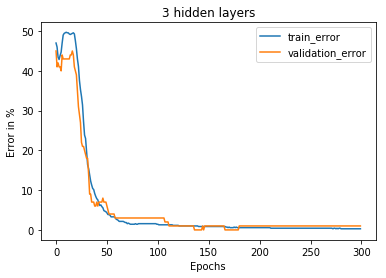

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('3 hidden layers')
plt.plot(train_error_list)
plt.plot(test_error_list)
plt.legend(['train_error', 'validation_error'], loc='upper right')
ax.set_xlabel('Epochs')
ax.set_ylabel('Error in %')
plt.savefig('3hiddenReluReluTanhTanh.png')
plt.show()

#### Test error Relu+Relu+Tanh+Tanh

In [ ]:
HL.test_model(model, test_inputs, test_targets)

#### Validation error Relu+Relu+Relu+Tanh

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('3 hidden layers')
plt.plot(train_error_list)
plt.plot(test_error_list)
plt.legend(['train_error', 'validation_error'], loc='upper right')
ax.set_xlabel('Epochs')
ax.set_ylabel('Error in %')
plt.savefig('3hidden_ReluReluReluTanh.png')
plt.show()

#### Test error Relu+Relu+Tanh+Tanh

In [ ]:
HL.test_model(model, test_inputs, test_targets)